**Задание 1: Векторизация текста с использованием Мешка слов (BoW) и TF-IDF**

1. Создайте корпус из минимум 10 текстовых документов (можно взять новостные статьи, отзывы на товары, статьи по одной тематике).
2. Реализуйте предобработку текста, включающую:
* Приведение к нижнему регистру
* Токенизацию
* Удаление стоп-слов и пунктуации
* Лемматизацию/стемминг
3. Реализуйте модель Мешка слов (BoW) с использованием CountVectorizer из scikit-learn.
4. Реализуйте модель TF-IDF с использованием TfidfVectorizer из scikit-learn.
5. Найдите 10 самых значимых терминов для каждого документа по обоим подходам и сравните результаты.
6. Визуализируйте сходство документов с помощью метрики косинусного расстояния для обоих подходов.
7. Прокомментируйте разницу в результатах между BoW и TF-IDF

In [2]:
!pip install gensim

import string
import re
import nltk
import spacy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter


nltk.download('punkt_tab')

# Загрузка моделей spaCy
nlp_en = spacy.load("en_core_web_sm")

# Загрузка стоп-слов
nltk.download('stopwords')
english_stopwords = set(stopwords.words('english'))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 17.0 MB/s eta 0:00:00


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
corpus = [
    "Hollywood Minute: Sabrina Carpenter to perform again at this year's Grammys. Sabrina Carpenter is returning to the Grammy Awards stage this year, adding to an already big night for the pop star. Carpenter is nominated for six Grammy trophies, including Song of the Year and Record of the Year for her hit “Man-Child.” Four of her nominations are tied to the song. The performance will mark her second time on the Grammys stage, after she won two awards at last year’s ceremony. The 68th Grammy Awards take place February 1. Meanwhile, a new high-stakes thriller is now streaming.'Steal' features intense action and suspense, with MI5 agents threatening deadly consequences during interrogations. Actor Archie Madekwe says co-star Sophie Turner helped keep spirits high on set despite the dark tone of the series.",
    "Leon Thomas, KATSEYE, Sabrina Carpenter, and More to Perform at the 2026 Grammy Awards. Just when it feels like the Grammys have hit their peak, they find a new way to surprise us. After last year’s show raised the bar with unforgettable performances and a powerful mission, Music’s Biggest Night is back and already buzzing with excitement. The 2026 Grammy Awards are shaping up to be part celebration, part showcase of the future, and fully packed with artists who have defined the sound of now. More Stars, More Surprises. Sabrina Carpenter has also been confirmed to perform, adding even more star power to an already stacked lineup. Additional artists will be announced in the coming days, which means the excitement is far from over. As names continue to roll out, it is clear that this year’s performers are already iconic in their own right.",
    "Sabrina Carpenter’s Pringles Teaser Explodes Before Super Bowl LX. Sabrina Carpenter’s cheeky Pringles teaser with a chip flower has TikTok on fire ahead of Super Bowl LX. Her debut ad is pure genius. Sabrina’s Chip Flower Has Everyone Hooked. Sabrina Carpenter just dropped the cutest Super Bowl teaser ever for Pringles, and it’s already everywhere. She’s on her kitchen floor in this pristine white turtleneck dress and kitten heels, plucking petals off a flower that’s literally made of Pringles chips. ‘He loves me, he loves me not,’ she says with that perfect mix of pouty and playful, landing on ‘he loves me’ before crunching the last chip.",
    "Sabrina Carpenter Takes the White Shoe Trend Sky-high With Louboutin Platform Pumps in New York City. Sabrina Carpenter took the white shoe trend sky-high in New York City on Saturday in Christian Louboutin’s white patent leather Daffodile platform pumps following her appearance on Saturday Night Live.The glossy pair leaned hard into height — something that seems to be a requirement for Carpenter’s shoe style. The Daffodile silhouette featured a closed, rounded toe and a thick, curved platform base under the front of the foot, along with a very thin stiletto heel. Louboutin’s signature red sole showed clearly along the arch and heel, cutting against the bright white patent upper.",
    "Sabrina Carpenter Makes a Surprise Cameo on Saturday Night Live Alongside Finn Wolfhard`.The segment—in which a group of 12-year-old boys debate snacks in fluent Gen Alpha slang—originated in October during Carpenter’s double-duty act on the show, in which she made her hosting debut and served as the musical guest on the same night. For this installment, the group was joined by a teenage streamer (played by the episode’s host, Stranger Things star Finn Wolfhard) and A$AP Rocky... played by A$AP Rocky. The Man’s Best Friend musician’s cameo marked her fourth time on SNL since her musical debut back in May 2024, and to celebrate, she hit the after party in style. Stepping out in New York City, Carpenter bundled up in a double-breasted Valentino Garavani coat, fashioned from black wool with an ankle-length silhouette and adorned with fur cuffs and a matching neckline for a cozy yet opulent feel. She left the piece open, revealing a sliver of her silky cream dress underneath, and grabbed her black leather Valentino bag for the evening.",
    "Sabrina Carpenter's $35 Perfume Brings Me More Compliments Than My $300 Bottles. I collect many things: matchbooks, sunglasses, handbags, and jewelry. But my favorite of all is my menagerie of perfumes. I enjoy mixing and matching my fragrances depending on my mood or outfit, and my scent preferences span a variety of categories, like sweet florals, bright citrus, and musk-forward blends. My latest obsession at the moment? Sweets. Winter is my favorite season to experiment with gourmand, candy-inspired scents. My most recent addition is Sabrina Carpenter’s Cherry Baby Eau de Parfum, which is only $35 but smells just as luxurious as my $300 perfumes. ",
    "Joe Keery & Sabrina Carpenter Spark Dating Rumors After SNL Outing. There have been many speculations that Sabrina Carpenter has been seeing someone for a while, and now, it seems that the fans have figured out who it is. After all, the “Please Please Please” singer was spotted leaving the Saturday Night Live after party. Also, she was spotted, while leaving, along with the “Stranger Things” actor, Joe Keery, while the paparazzi camera flashed in the background. As expected, this sighting actually had the rumor mill going at it, all over again.",
    "Sabrina Carpenter Height All you need to know about Sabrina Carpenter Height and Weight. When people search for Sabrina Carpenter’s height, they are not just looking for numbers. They are curious as to how her physical stature fits into her journey as a pop icon, actress, and global fashion influencer. From Disney Channel beginnings to sold-out tours to chart-topping albums, Sabrina Carpenter has shown that it takes more than just height to have confidence, talent, and personality. In this complete guide, we’ll look at Sabrina Carpenter’s height and weight, how her body proportions work in the entertainment business, and why her small frame has become part of her signature image rather than a downside.",
    "Sabrina Carpenter, Joe Keery spark buzz with reunion at 'SNL'. Sabrina Carpenter and Joe Keery are the internet’s favourite duo to ship, ever since their flirtatious back-and-forth at the Short n’ Sweet tour went viral. The 26-year-old pop superstar and Djo, 33, continued to show public support for each other after the show by attending each other’s concerts and interacting on social media. While there has been no official relationship update from either the Disney alum or the End of Beginning hitmaker, social media sleuths just got another update in the duo’s romance speculation.",
    "Sabrina Carpenter Shows Off Completely Sheer, Jeweled Dress in New Year’s Eve Photos. On Sunday, pop star Sabrina Carpenter shared some photos from her recent holiday in the snow-covered countryside on Instagram. She also offered her fans a look at some of her outfits for New Year’s Eve, which were glittery, sheer, and pretty much perfect. In one picture, Carpenter is wearing a sleeveless dress with a knee-length skirt. It was covered in strategically placed silver appliqué across completely sheer fabric. The singer posed for a mirror selfie to show off the look, which revealed her matching white bra and panty set. She was posing in a large room lined with wood, several throw pillows and blankets on the ground."
]


In [4]:

def normalize_text(text):
  normal_text = []
  for text in corpus:
      text = text.lower()
      text = re.sub(r'[^\w\s]', ' ', text)
      text = text.replace("  ", " ")
      tokens = text.split()
      filtered_tokens = [token for token in tokens if token not in english_stopwords]
      text = ' '.join(filtered_tokens)

      doc = nlp_en(text)
      lemmas = [token.lemma_ for token in doc if token.is_alpha]
      text = ' '.join(lemmas)
      normal_text.append(text)
  return normal_text
documents = normalize_text(corpus)
print(documents)

print("Предобработанные документы:")
for i, doc in enumerate(documents, 1):
    print(f"Документ {i}: {doc}")

['hollywood minute sabrina carpenter perform year grammy sabrina carpenter return grammy awards stage year add already big night pop star carpenter nominate six grammy trophy include song year record year hit man child four nomination tie song performance mark second time grammy stage two award last year ceremony grammy award take place february meanwhile new high stake thriller streaming steal feature intense action suspense agent threaten deadly consequence interrogation actor archie madekwe say co star sophie turner helped keep spirit high set despite dark tone series', 'leon thomas katseye sabrina carpenter perform grammy award feel like grammy hit peak find new way surprise we last year show raise bar unforgettable performance powerful mission music big night back already buzz excitement grammy awards shape part celebration part showcase future fully pack artist define sound star surprise sabrina carpenter also confirm perform add even star power already stack lineup additional ar

In [ ]:
# Создание векторизатора
count_vectorizer = CountVectorizer()

# Обучение векторизатора и преобразование документов
bow_matrix = count_vectorizer.fit_transform(documents)

# Получение списка фичей (слов)
feature_names = count_vectorizer.get_feature_names_out()

# Преобразование разреженной матрицы в плотную для наглядности
bow_df = pd.DataFrame(
    bow_matrix.toarray(),
    columns=feature_names,
    index=[f'Документ {i+1}' for i in range(len(documents))]
)

# Вывод матрицы Bag of Words
print(bow_df)

             across  act  action  actor  actress  actually  ad  add  addition  \
Документ 1        0    0       1      1        0         0   0    1         0   
Документ 2        0    0       0      0        0         0   0    1         0   
Документ 3        0    0       0      0        0         0   1    0         0   
Документ 4        0    0       0      0        0         0   0    0         0   
Документ 5        0    1       0      0        0         0   0    0         0   
Документ 6        0    0       0      0        0         0   0    0         1   
Документ 7        0    0       0      1        0         1   0    0         0   
Документ 8        0    0       0      0        1         0   0    0         0   
Документ 9        0    0       0      0        0         0   0    0         0   
Документ 10       1    0       0      0        0         0   0    0         0   

             additional  ...  weight  white  winter  wolfhard  wood  wool  \
Документ 1            0  ...   

In [ ]:
tfidf_vectorizer = TfidfVectorizer()

# Обучение векторизатора и преобразование документов
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Преобразование в DataFrame
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=tfidf_vectorizer.get_feature_names_out(),
    index=[f'Документ {i+1}' for i in range(len(documents))]
)

print(tfidf_df)

               across      act    action     actor   actress  actually  \
Документ 1   0.000000  0.00000  0.101047  0.085899  0.000000  0.000000   
Документ 2   0.000000  0.00000  0.000000  0.000000  0.000000  0.000000   
Документ 3   0.000000  0.00000  0.000000  0.000000  0.000000  0.000000   
Документ 4   0.000000  0.00000  0.000000  0.000000  0.000000  0.000000   
Документ 5   0.000000  0.08949  0.000000  0.000000  0.000000  0.000000   
Документ 6   0.000000  0.00000  0.000000  0.000000  0.000000  0.000000   
Документ 7   0.000000  0.00000  0.000000  0.117952  0.000000  0.138752   
Документ 8   0.000000  0.00000  0.000000  0.000000  0.117296  0.000000   
Документ 9   0.000000  0.00000  0.000000  0.000000  0.000000  0.000000   
Документ 10  0.109069  0.00000  0.000000  0.000000  0.000000  0.000000   

                   ad       add  addition  additional  ...    weight  \
Документ 1   0.000000  0.085899   0.00000    0.000000  ...  0.000000   
Документ 2   0.000000  0.094810   0.00000

In [ ]:
bow_sum = np.sum(bow_matrix.toarray(), axis=0)


word_bow_dict = dict(zip(feature_names, bow_sum))

top_bow_words = sorted(word_bow_dict.items(), key=lambda x: x[1], reverse=True)[:10]

print("=== Топ-10 слов по всей коллекции ===\n")
print("Топ-10 слов по BOW (самые частые):")
for word, count in top_bow_words:
    print(f"- {word}: {count} раз")

tfidf_sum = np.sum(tfidf_matrix.toarray(), axis=0)

word_tfidf_dict = dict(zip(feature_names, tfidf_sum))

top_tfidf_words = sorted(word_tfidf_dict.items(), key=lambda x: x[1], reverse=True)[:10]

print("\nТоп-10 слов по TF-IDF (с наибольшим весом):")
for word, score in top_tfidf_words:
    print(f"- {word}: {score:.4f}")

print("\nСравнение топ-10 слов:")
bow_words = [word for word, _ in top_bow_words]
tfidf_words = [word for word, _ in top_tfidf_words]

common_words = set(bow_words) & set(tfidf_words)
bow_only = set(bow_words) - common_words
tfidf_only = set(tfidf_words) - common_words

if common_words:
    print(f"Общие слова в обоих топ-10: {', '.join(common_words)}")
if bow_only:
    print(f"Только в BOW топ-10: {', '.join(bow_only)}")
if tfidf_only:
    print(f"Только в TF-IDF топ-10: {', '.join(tfidf_only)}")

=== Топ-10 слов по всей коллекции ===

Топ-10 слов по BOW (самые частые в коллекции):
- carpenter: 28 раз
- sabrina: 24 раз
- year: 11 раз
- grammy: 8 раз
- show: 8 раз
- new: 7 раз
- height: 6 раз
- night: 6 раз
- star: 6 раз
- white: 6 раз

Топ-10 слов по TF-IDF (с наибольшим весом по всей коллекции):
- carpenter: 1.1291
- sabrina: 0.9842
- grammy: 0.7139
- year: 0.6917
- height: 0.5797
- show: 0.4776
- joe: 0.4551
- keery: 0.4551
- white: 0.4338
- new: 0.4222

Сравнение топ-10 слов:
Общие слова в обоих топ-10: new, grammy, year, height, show, white, carpenter, sabrina
Только в BOW топ-10: night, star
Только в TF-IDF топ-10: keery, joe


In [ ]:
def preprocess_text(text):
    # Преобразуем в нижний регистр
    text = text.lower()

    # Удаляем пунктуацию (оставляем только буквы и пробелы)
    text = re.sub(r'[^\w\s]', '', text)

    # Токенизация (разбиение на слова)
    tokens = word_tokenize(text)

    return tokens

processed_corpus = [preprocess_text(text) for text in documents]

model = Word2Vec(
    sentences=processed_corpus,
    vector_size = 100,  # Размерность векторов (обычно от 100 до 300)
    window = 5,  # Размер контекстного окна (сколько слов слева и справа учитывать)
    min_count = 1,  # Минимальная частота слова для включения в модель
    sg = 1,  # 1 = Skip-gram, 0 = CBOW
    hs = 0,  # 0 = использовать negative sampling, 1 = иерархический softmax
    negative = 5,  # Количество "негативных" семплов для negative sampling
    ns_exponent = 0.75,  # Экспонента для отрицательного сэмплирования
    cbow_mean = 1,  # Для CBOW: 1 = использовать среднее, 0 = сумму
    alpha = 0.025,  # Начальная скорость обучения
    min_alpha = 0.0001,  # Минимальная скорость обучения
    seed = 42,  # Для воспроизводимости результатов
    workers = 4,  # Количество потоков для параллельного обучения
)


def text_to_vector(text, model):

    # Предобрабатываем предложение
    words = preprocess_text(text)

    # Отбираем только слова, которые есть в модели
    words = [word for word in words if word in model.wv]

    if not words:
        # Если не нашлось ни одного известного слова, вернем нулевой вектор
        return np.zeros(model.vector_size)

    # Получаем векторы слов
    word_vectors = [model.wv[word] for word in words]

    # Возвращаем средний вектор
    return np.mean(word_vectors, axis=0)

# Создаем векторные представления для всех предложений корпуса
text_vectors = [text_to_vector(text, model) for text in documents]

def find_similar_sentences(query, corpus, model, top_n=10):
    # Преобразуем запрос в вектор
    query_vector = text_to_vector(query, model)
    query_norm = np.linalg.norm(query_vector)
    if query_norm == 0:
    # В запросе не оказалось слов из словаря модели
        return []

    similarities = []
    for i, text_vector in enumerate(text_vectors):
        denom = query_norm * np.linalg.norm(text_vector)
        if denom == 0:
            similarity = 0.0
        else:
            similarity = float(np.dot(query_vector, text_vector) / denom)

        similarities.append((documents[i], similarity))

    # Сортируем по убыванию сходства
    similarities.sort(key=lambda x: x[1], reverse=True)

    # Возвращаем top_n результатов
    return similarities[:top_n]

print("\n=== Поиск похожих предложений ===")
for query in corpus:
    # Чтобы запрос не был слишком громозким
    tokens = query.split()
    query = " ".join(tokens)
    print(f"\nЗапрос: {query}")
    similar = find_similar_sentences(query, documents, model)
    for i, (text, score) in enumerate(similar, 1):
        print(f"{i}. {text[:20]} (сходство: {score:.4f})")



=== Поиск похожих предложений ===

Запрос: Hollywood Minute: Sabrina Carpenter to perform again at this year's Grammys. Sabrina Carpenter is returning to the Grammy Awards stage this year, adding to an already big night for the pop star. Carpenter is nominated for six Grammy trophies, including Song of the Year and Record of the Year for her hit “Man-Child.” Four of her nominations are tied to the song. The performance will mark her second time on the Grammys stage, after she won two awards at last year’s ceremony. The 68th Grammy Awards take place February 1. Meanwhile, a new high-stakes thriller is now streaming.'Steal' features intense action and suspense, with MI5 agents threatening deadly consequences during interrogations. Actor Archie Madekwe says co-star Sophie Turner helped keep spirits high on set despite the dark tone of the series.
1. hollywood minute sab (сходство: 0.9359)
2. leon thomas katseye  (сходство: 0.6814)
3. sabrina carpenter sh (сходство: 0.5920)
4. sabrina car

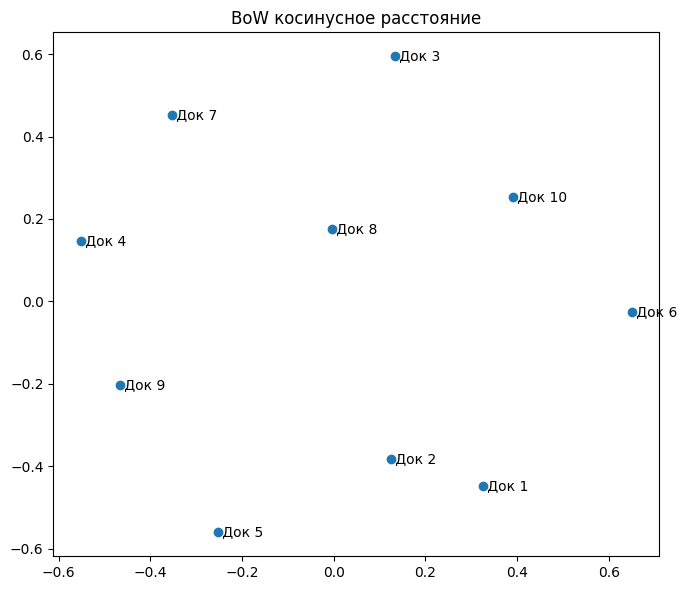

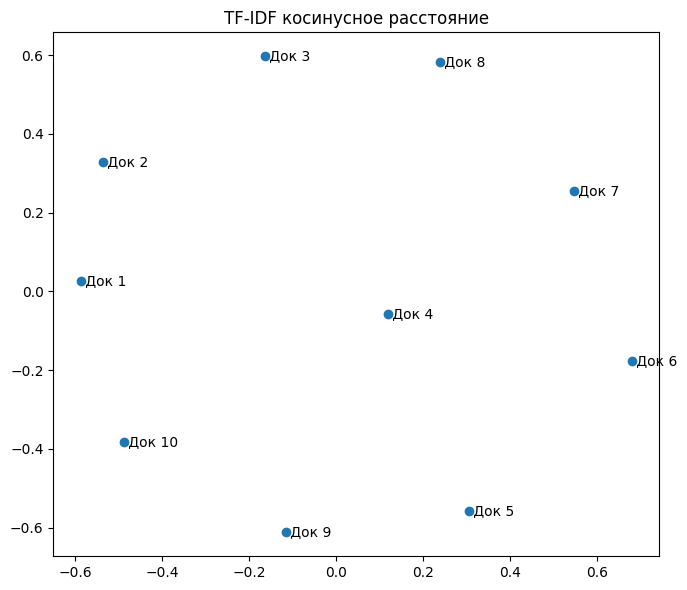

In [ ]:
docs_clean = [" ".join(preprocess_text(d)) for d in documents]
labels = [f"Док {i+1}" for i in range(len(docs_clean))]

bow = CountVectorizer()
X_bow = bow.fit_transform(docs_clean)

tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(docs_clean)
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import cosine_distances

def plot_mds(X, labels, title):
    D = cosine_distances(X)
    coords = MDS(n_components=2, dissimilarity="precomputed", random_state=42).fit_transform(D)

    plt.figure(figsize=(7,6))
    plt.scatter(coords[:,0], coords[:,1])
    for i, lab in enumerate(labels):
        plt.text(coords[i,0], coords[i,1], " " + lab, va="center")
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_mds(X_bow, labels, "BoW косинусное расстояние")
plot_mds(X_tfidf, labels, "TF-IDF косинусное расстояние")



Разница в использовании двух методах есть, BoW часто поднимает самые частотные слова документа, TF-IDF лучше выделяет уникальную лексику, отодвигая более общие слова

**Задание 2: Морфологическая разметка текста**

1. Возьмите отрывок текста (минимум 300 слов) на русском и английском языке.
2. Для русского языка используйте PyMorphy2 или PyMorphy3, для английского - NLTK или SpaCy для проведения морфологического анализа.
3. Выполните следующие операции:
* Определите части речи для каждого слова в тексте
* Для существительных определите падеж, род и число
* Для глаголов определите время, лицо и число
* Создайте частотный словарь частей речи в тексте
4. Разработайте функцию, которая будет автоматически изменять текст, заменяя все существительные на их форму множественного числа (где возможно).
5. Результаты морфологического анализа должны быть представлены в виде таблицы.
6. Оцените и прокомментируйте точность определения морфологических характеристик

In [ ]:
!pip install pymorphy3 -q

import pymorphy3
morph = pymorphy3.MorphAnalyzer(lang='ru')
from collections import Counter

text_ru = """Это повесть о событиях, случившихся в Нарнии и к Югу от неё тогда, когда ею правили король Питер и его брат и две сестры. В те дни далеко на Юге, у моря, жил бедный рыбак по имени Аршиш, а с ним мальчик по имени Шаста, звавший его отцом. Утром Аршиш выходил в море ловить рыбу, а днём запрягал осла, клал рыбу в повозку и ехал в ближайшую деревню торговать. Если он выручал много, он возвращался в добром духе и Шасту не трогал; если выручал мало, придирался, как только мог, и даже бил мальчика. Придраться было нетрудно, Шаста делал по дому всё – стирал и чинил сети, стряпал и убирал.
Шаста никогда не думал о том, что лежит от них к Югу; он бывал с Аршишем в деревне, и ему там не нравилось. Он видел точно таких людей, как его отец, – в грязных длинных одеждах, сандалиях и тюрбанах, с грязными длинными бородами, медленно толковавших об очень скучных делах. Зато его живо занимало всё, что лежит к Северу; но туда его не пускали. Чиня на пороге сети, он с тоской глядел на Север, но видел только склон холма, небо и редких птиц.
Когда Аршиш сидел дома, Шаста спрашивал: «Отец, что там, за холмом?» Если Аршиш сердился, он драл его за уши, если же был спокоен, отвечал: «Сын мой, не думай о пустом. Как сказал мудрец, прилежание – корень успеха, а те, кто задаёт пустые вопросы, ведут корабль глупости на рифы неудачи».
Шасте казалось, что за холмом – какая-то дивная тайна, которую отец до поры скрывает от него. На самом же деле рыбак говорил так, ибо не знал, да и знать не хотел, какие земли лежат к Северу. У него был практ
"""

text_en = """THIS is the story of an adventure that happened in Narnia and Calormen and the lands between, in the Golden Age when Peter was High King in Narnia and his brother and his two sisters were King and Queens under him.
In those days, far south in Calormen on a little creek of the sea, there lived a poor fisherman called Arsheesh, and with him there lived a boy who called him Father. The boy’s name was Shasta. On most days Arsheesh went out in his boat to fish in the morning, and in the afternoon he harnessed his donkey to a cart and loaded the cart with fish and went a mile or so southward to the
village to sell it. If it had sold well he would come home in a moderately good temper and say nothing to Shasta, but if it had sold badly he would find fault with him and perhaps beat him. There was always something to find fault with for Shasta had plenty of work to do, mending and washing the nets, cooking the supper, and cleaning the cottage in which they both lived.
Shasta was not at all interested in anything that lay south of his home because he had once or twice been to the village with Arsheesh and he knew that there was nothing very interesting there. In the village he only met other men who were just like his father—men with long, dirty robes, and wooden shoes turned up at the toe, and turbans on their heads, and beards, talking to one another very slowly about things that sounded dull.
But he was very interested in everything that lay to the North because no one ever went that way and he was never allowed to go there himself. When he was sitting out of doors mending the nets, and all alone, he would often look eagerly to the North. One could see nothing but a grassy slope running up to a level ridge and beyond that the sky with perhaps a few birds in it."""


def tokenize_ru(text):

    words = re.findall(r'\b[\w-]+\b', text)
    return words

tokens_ru = tokenize_ru(text_ru)

analysis_results = []
pos_list = []

for word_text in tokens_ru:
    parsed_word = morph.parse(word_text)[0]

    pos = parsed_word.tag.POS if parsed_word.tag.POS else 'UNKN'
    pos_list.append(pos)


    case, gender, number, tense, person = None, None, None, None, None

    if pos == 'NOUN':
        case = parsed_word.tag.case
        gender = parsed_word.tag.gender
        number = parsed_word.tag.number
    elif pos == 'VERB' or pos == 'INFN':
        tense = parsed_word.tag.tense
        person = parsed_word.tag.person
        number = parsed_word.tag.number

    analysis_results.append({
        'Word': word_text,
        'POS': pos,
        'Case': case,
        'Gender': gender,
        'Number': number,
        'Tense': tense,
        'Person': person
    })


morph_df_ru = pd.DataFrame(analysis_results)
print("\n--- Морфологический анализ русского текста ---")
print(morph_df_ru)


pos_count = Counter(pos_list)
print("\n--- Частота частей речи (Русский) ---")
for pos, count in pos_count.most_common():
    print(f"{pos:10}: {count}")


def pluralize_nouns_ru(text):
    words = tokenize_ru(text)
    result_words = []
    for w in words:
        parsed = morph.parse(w.lower())[0] # Parse in lowercase for better matching with dictionary
        if 'NOUN' in parsed.tag:
            inflected = parsed.inflect({'plur'})
            if inflected:
                result_words.append(inflected.word)
            else:
                result_words.append(w)
        else:
            result_words.append(w)
    return ' '.join(result_words)

print("\n--- Преобразование существительных в множественное число ---")
print("Оригинальный текст: ", text_ru)
print("Текст с мн.ч. существительных: ", pluralize_nouns_ru(text_ru))

print("Russian morphological analysis and noun pluralization completed.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 70.1 MB/s eta 0:00:00

--- Морфологический анализ русского текста ---
            Word   POS  Case Gender Number Tense Person
0            Это  PRCL  None   None   None  None   None
1        повесть  NOUN  nomn   femn   sing  None   None
2              о  PREP  None   None   None  None   None
3       событиях  NOUN  loct   neut   plur  None   None
4    случившихся  PRTF  None   None   None  None   None
..           ...   ...   ...    ...    ...   ...    ...
271       Северу  NOUN  datv   masc   sing  None   None
272            У  PREP  None   None   None  None   None
273         него  NPRO  None   None   None  None   None
274          был  VERB  None   None   sing  past   None
275        практ  NOUN  nomn   masc   sing  None   None

[276 rows x 7 columns]

--- Частота частей речи (Русский) ---
NOUN      : 79
VERB      : 46
PREP      : 37
CONJ      : 33
AD

In [ ]:
doc_en = nlp_en(text_en)

analysis_results_en = []
pos_list_en = []

for token in doc_en:
    if token.is_punct or token.is_space:
        continue

    pos = token.pos_
    pos_list_en.append(pos)


    number, tense, person = None, None, None

    if pos == 'NOUN':
        if 'Sing' in token.tag_:
            number = 'SING'
        elif 'Plur' in token.tag_:
            number = 'PLUR'

    elif pos == 'VERB':

        tense = token.morph.get('Tense')
        person = token.morph.get('Person')

        number = token.morph.get('Number')


        tense = ', '.join(tense) if tense else None
        person = ', '.join(person) if person else None
        number = ', '.join(number) if number else None

    analysis_results_en.append({
        'Word': token.text,
        'POS': pos,
        'Number': number,
        'Tense': tense,
        'Person': person
    })

morph_df_en = pd.DataFrame(analysis_results_en)
print("--- Морфологический анализ английского текста ---")
print(morph_df_en.to_string())

pos_count_en = Counter(pos_list_en)
print("\n--- Частота частей речи (Английский) ---")
for pos, count in pos_count_en.most_common():
    print(f"{pos:10}: {count}")

def pluralize_nouns_en(text):
    doc = nlp_en(text)
    result_words = []
    for token in doc:
        if token.pos_ == 'NOUN' and 'Sing' in token.tag_:
            plural_form = token.lemma_ + 's'
            result_words.append(plural_form)
        else:
            result_words.append(token.text)
    return ' '.join(result_words)

print("\n--- Преобразование существительных в множественное число (Английский) ---")
print("Оригинальный текст: ", text_en[:200] + '...')
pluralized_text = pluralize_nouns_en(text_en)
print("Текст с мн.ч. существительных: ", pluralized_text[:200] + '...')


--- Морфологический анализ английского текста ---
            Word    POS Number Tense Person
0           THIS   PRON   None  None   None
1             is    AUX   None  None   None
2            the    DET   None  None   None
3          story   NOUN   None  None   None
4             of    ADP   None  None   None
5             an    DET   None  None   None
6      adventure   NOUN   None  None   None
7           that   PRON   None  None   None
8       happened   VERB   None  Past   None
9             in    ADP   None  None   None
10        Narnia  PROPN   None  None   None
11           and  CCONJ   None  None   None
12      Calormen  PROPN   None  None   None
13           and  CCONJ   None  None   None
14           the    DET   None  None   None
15         lands   NOUN   None  None   None
16       between    ADP   None  None   None
17            in    ADP   None  None   None
18           the    DET   None  None   None
19        Golden  PROPN   None  None   None
20           Age  PROPN   

**Задание 3: Синтаксический анализ предложений**

1. Возьмите 2 простых и 3 сложных предложений на русском и английском языке (всего 10 предложений).
2. Используйте SpaCy для построения синтаксических деревьев этих предложений.
3. Для каждого предложения:
* Визуализируйте синтаксическое дерево
* Выделите все подлежащие и сказуемые
* Найдите все пары слов, связанные отношением определения (прилагательное-существительное)
4. Разработайте функцию для извлечения всех объектных и субъектных отношений из предложения в формате (субъект, предикат, объект).
5. Объясните, какие трудности возникают при синтаксическом анализе сложных предложений

In [16]:
!python -m spacy download ru_core_news_md
!python -m spacy download en_core_web_md

from spacy import displacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 MB 19.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 16.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [19]:
english_sentences = [
        "The cat sat on the mat.",
        "She reads a book every day.",
        "Although it was raining, they decided to go for a walk in the park, which surprised everyone.",
        "Because he studied hard, he passed the exam, and his parents were very proud.",
        "When the sun sets, the stars appear, and the moon shines brightly in the night sky."
    ]

russian_sentences = [
        "Солнце светит ярко.",
        "Дети играют во дворе.",
        "Хотя был сильный дождь, они решили пойти на прогулку в парк, что удивило всех.",
        "Поскольку он усердно учился, он сдал экзамен, и его родители были очень горды.",
        "Когда заходит солнце, появляются звезды, и луна ярко светит в ночном небе."
    ]


In [18]:
nlp_ru = spacy.load("ru_core_news_md")
nlp_en = spacy.load("en_core_web_md")

In [20]:
for sentence in russian_sentences:
    doc_ru = nlp_ru(sentence)

    print(f"Sentence {russian_sentences.index(sentence)}")
    displacy.render(doc_ru, style="dep", jupyter=True, options={"distance": 100, "compact": True})


Sentence 0


Sentence 1


Sentence 2


Sentence 3


Sentence 4


In [21]:
for sentence in english_sentences:
    doc_en = nlp_en(sentence)

    print(f"Sentence {english_sentences.index(sentence)}")
    displacy.render(doc_en, style="dep", jupyter=True, options={"distance": 100, "compact": True})

Sentence 0


Sentence 1


Sentence 2


Sentence 3


Sentence 4


In [22]:
def find_subj_and_pred_eng(doc):
    subj = []
    pred_tokens = []
    root = None

    # Находим корень
    for token in doc:
        if token.dep_ == "ROOT":
            root = token
            pred_tokens.append(token)
            break

    if not root:
        return [], []

    # Находим все компоненты составного сказуемого
    for token in doc:
        if token.dep_ in ["aux", "auxpass"] and token.head in [root] + [t for t in pred_tokens]:
            pred_tokens.append(token)

    # Составляем сказуемое в правильном порядке
    pred = [doc[i].text for i in sorted([t.i for t in pred_tokens])]

    # Ищем подлежащее где угодно в предложении
    for token in doc:
        if token.dep_ in ["nsubj", "nsubjpass"]:
            # Проверяем, является ли это подлежащим по отношению к ROOT или его компонентам
            current = token
            while current.head != current:  # Поднимаемся по дереву до корня
                if current.head in pred_tokens or current.head == root:
                    # Нашли подлежащее, связанное с нашим сказуемым
                    subj.append(token.text)
                    break
                current = current.head

    # Если все равно не нашли подлежащее - ищем более агрессивно
    if not subj:
        for token in doc:
            if token.dep_ in ["nsubj", "nsubj:pass"]:
                subj.append(token.text)

    return subj, pred


print("English sentences")
for text in english_sentences:
    doc = nlp_en(text)
    subject, predicate = find_subj_and_pred_eng(doc)
    print(f"Предложение: {text}")
    print(f"Подлежащее: {subject}, Сказуемое: {predicate}")
    print()

English sentences
Предложение: The cat sat on the mat.
Подлежащее: ['cat'], Сказуемое: ['sat']

Предложение: She reads a book every day.
Подлежащее: ['She'], Сказуемое: ['reads']

Предложение: Although it was raining, they decided to go for a walk in the park, which surprised everyone.
Подлежащее: ['it', 'they', 'which'], Сказуемое: ['decided']

Предложение: Because he studied hard, he passed the exam, and his parents were very proud.
Подлежащее: ['he', 'he', 'parents'], Сказуемое: ['passed']

Предложение: When the sun sets, the stars appear, and the moon shines brightly in the night sky.
Подлежащее: ['sun', 'stars', 'moon'], Сказуемое: ['appear']



In [23]:
def find_subj_pred_rus(doc):
    root = None
    pred_tokens = []

    for token in doc:
        if token.dep_ == "ROOT":
            root = token
            pred_tokens.append(token)
            break

    if not root:
        return [], []

    changed = True
    while changed:
        changed = False
        for t in doc:
            if t.dep_ == "conj" and t.head in pred_tokens and t.pos_ in {"VERB", "AUX"}:
                if t not in pred_tokens:
                    pred_tokens.append(t)
                    changed = True

    def pred_text(p):
        parts = {p}
        for ch in p.children:
            if ch.dep_ in {"aux", "auxpass", "cop", "neg"}:
                parts.add(ch)
            if ch.dep_ == "xcomp" and ch.pos_ in {"VERB", "AUX"}:
                parts.add(ch)
        return " ".join(tok.text for tok in sorted(parts, key=lambda x: x.i))

    def subjects(p):
        subs = [ch for ch in p.children if ch.dep_ in {"nsubj", "nsubjpass", "nsubj:pass"}]
        if subs:
            return subs
        if p.dep_ == "conj":
            return subjects(p.head)
        return []

    all_subj = []
    all_pred = []
    for p in sorted(pred_tokens, key=lambda x: x.i):
        all_pred.append(pred_text(p))
        all_subj.extend([s.text for s in subjects(p)])

    return all_subj, all_pred

    print("Russian sentences")
for text in russian_sentences:
    doc = nlp_ru(text)
    subject, predicate = find_subj_pred_rus(doc)
    print(f"Предложение: {text}")
    print(f"Подлежащее: {subject}, Сказуемое: {predicate}")
    print()

Предложение: Солнце светит ярко.
Подлежащее: ['Солнце'], Сказуемое: ['светит']

Предложение: Дети играют во дворе.
Подлежащее: ['Дети'], Сказуемое: ['играют']

Предложение: Хотя был сильный дождь, они решили пойти на прогулку в парк, что удивило всех.
Подлежащее: ['они'], Сказуемое: ['решили пойти']

Предложение: Поскольку он усердно учился, он сдал экзамен, и его родители были очень горды.
Подлежащее: ['он'], Сказуемое: ['сдал']

Предложение: Когда заходит солнце, появляются звезды, и луна ярко светит в ночном небе.
Подлежащее: ['звезды', 'луна'], Сказуемое: ['появляются', 'светит']



In [25]:
print("\nПоиск пар слов, связанных отношением определения (прилагательное-существительное) (русский):")
for sentence in russian_sentences:
    doc_ru = nlp_ru(sentence)
    for token in doc_ru:
        if token.dep_ == "amod":
            print(f"Найден объект: {token.text} — зависит от существительного: {token.head.text}")

print("\nПоиск пар слов, связанных отношением определения (прилагательное-существительное) (english):")
for sentence in english_sentences:
    doc_en = nlp_en(sentence)
    for token in doc_en:
        if token.dep_ == "amod":
            print(f"Найден объект: {token.text} — зависит от существительного: {token.head.text}")


Поиск пар слов, связанных отношением определения (прилагательное-существительное) (русский):
Найден объект: сильный — зависит от существительного: дождь
Найден объект: ночном — зависит от существительного: небе

Поиск пар слов, связанных отношением определения (прилагательное-существительное) (english):


In [26]:
def get_svo(sentence, lang='en'):
    if lang == 'rus':
        doc = nlp_ru(sentence)
        for token in doc:
            if token.dep_ == "nsubj":
                subj = token.text
            if token.dep_ == "obj":
                obj = token.text
                predicate = token.head.text
                print(f"{subj} {predicate} {obj} ")
    else:
        doc = nlp_en(sentence)
        for token in doc:
            if token.dep_ in {"nsubj", "nsubjpass", "csubj", "csubjpass"}:
                subj = token.text
                predicate = token.head.text
            if token.dep_ in {"dobj", "iobj", "obj"}:
                obj = token.text
                print(f"{subj} {predicate} {obj}")

print("Русское SVO")
print(25 * '*')
for sentence in russian_sentences:
    get_svo(sentence, 'rus')

print("\nАнглийское SVO")
print(25 * '*')
for sentence in english_sentences:
    get_svo(sentence, 'en')


Русское SVO
*************************
что удивило всех 
он сдал экзамен 

Английское SVO
*************************
She reads book
which surprised everyone
he passed exam


**Задание 4: Распознавание именованных сущностей (Named Entity Recognition)**

1. Подготовьте корпус из 10 новостных текстов, содержащий различные типы именованных сущностей (имена людей, организации, географические названия, даты и т.д.) на английском или русском языке.
2. Используйте SpaCy для автоматического распознавания именованных сущностей.
3. Реализуйте свой простой метод для распознавания имен людей и географических названий с помощью регулярных выражений и словарей.
4. Сравните результаты работы SpaCy и вашего метода:
* Рассчитайте точность (precision), полноту (recall) и F1-меру для вашего метода относительно результатов SpaCy
* Проанализируйте ошибки обоих подходов, какие типы ошибок характерны для каждого подхода
5. Представьте сравнение результатов в виде таблицы

In [6]:
# ваш код
from spacy import displacy

nlp = spacy.load("en_core_web_sm")

spacy_results = []

for i, text in enumerate(corpus, 1):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    spacy_results.append({
        "text": text,
        "entities": entities
    })

    print(f"\n[{i}] {text}")
    print("spaCy:", entities)


[1] Hollywood Minute: Sabrina Carpenter to perform again at this year's Grammys. Sabrina Carpenter is returning to the Grammy Awards stage this year, adding to an already big night for the pop star. Carpenter is nominated for six Grammy trophies, including Song of the Year and Record of the Year for her hit “Man-Child.” Four of her nominations are tied to the song. The performance will mark her second time on the Grammys stage, after she won two awards at last year’s ceremony. The 68th Grammy Awards take place February 1. Meanwhile, a new high-stakes thriller is now streaming.'Steal' features intense action and suspense, with MI5 agents threatening deadly consequences during interrogations. Actor Archie Madekwe says co-star Sophie Turner helped keep spirits high on set despite the dark tone of the series.
spaCy: [('Hollywood Minute', 'ORG'), ('Sabrina Carpenter', 'PERSON'), ('year', 'DATE'), ('Grammys', 'GPE'), ('Sabrina Carpenter', 'PERSON'), ('the Grammy Awards', 'WORK_OF_ART'), ('t

In [12]:
import re

PERSON = {
    "Sabrina Carpenter", "Joe Keery", "Finn Wolfhard", "Vladimir Putin", "Putin",
    "Yvette Cooper", "Elon Musk", "António Guterres", "Guterres"
}

KNOWN_GPE = {
    "Hollywood", "Denmark", "Russia", "Ukraine", "Gaza", "Davos",
    "Arctic", "US", "United States", "BBC", "NATO", "Ryanair", "New York City"
}

EVENT = {
    "Grammy", "Grammys", "New Year’s Eve", "Super Bowl"
}

MEDIA_CONTENT = {
    "SNL", "Stranger Things", "Saturday Night Live",
}

COMPANY = {
    "Louboutin", "Cherry Baby", "Pringles", "Instagram", "TikTok"}
WORK_OF_ART = {
    "The Man’s Best Friend", "Please Please Please",
}

DATE_PATTERNS = [
    r'\d{1,2}\s(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}',
    r'\d{4}'
]

def rule_based_ner(text):
    entities = []

    # People
    for person in PERSON:
        if re.search(r'\b' + re.escape(person) + r'\b', text, re.IGNORECASE): # Case-insensitive word boundary match
            entities.append((person, "PERSON"))

    # Geographical entities
    for gpe in KNOWN_GPE:
        if re.search(r'\b' + re.escape(gpe) + r'\b', text, re.IGNORECASE):
            entities.append((gpe, "GPE"))

    # Events
    for event in EVENT:
        if re.search(r'\b' + re.escape(event) + r'\b', text, re.IGNORECASE):
            entities.append((event, "EVENT"))

    # Media Content
    for media in MEDIA_CONTENT:
        if media and re.search(r'\b' + re.escape(media) + r'\b', text, re.IGNORECASE): # Ensure media is not an empty string
            entities.append((media, "MEDIA_CONTENT"))

    # Companies
    for company in COMPANY:
        if re.search(r'\b' + re.escape(company) + r'\b', text, re.IGNORECASE):
            entities.append((company, "COMPANY"))

    # Works of Art
    for work in WORK_OF_ART:
        if re.search(r'\b' + re.escape(work) + r'\b', text, re.IGNORECASE):
            entities.append((work, "WORK_OF_ART"))

    # Dates (simple regex search for patterns)
    for pat in DATE_PATTERNS:
        for m in re.finditer(pat, text, re.IGNORECASE):
            entities.append((m.group(), "DATE"))

    return list(set(entities))

# Display results for each document in the original corpus.
print("--- Rule-based NER results for each document ---")
for i, doc_text in enumerate(corpus):
    result_entities = rule_based_ner(doc_text)
    print(f"\nDocument {i+1}: {doc_text[:100]}...") # Print snippet of text
    print(f"  Entities: {result_entities}")

--- Rule-based NER results for each document ---

Document 1: Hollywood Minute: Sabrina Carpenter to perform again at this year's Grammys. Sabrina Carpenter is re...
  Entities: [('Sabrina Carpenter', 'PERSON'), ('Grammy', 'EVENT'), ('Grammys', 'EVENT'), ('Hollywood', 'GPE')]

Document 2: Leon Thomas, KATSEYE, Sabrina Carpenter, and More to Perform at the 2026 Grammy Awards. Just when it...
  Entities: [('Grammy', 'EVENT'), ('2026', 'DATE'), ('Sabrina Carpenter', 'PERSON'), ('US', 'GPE'), ('Grammys', 'EVENT')]

Document 3: Sabrina Carpenter’s Pringles Teaser Explodes Before Super Bowl LX. Sabrina Carpenter’s cheeky Pringl...
  Entities: [('Sabrina Carpenter', 'PERSON'), ('TikTok', 'COMPANY'), ('Super Bowl', 'EVENT'), ('Pringles', 'COMPANY')]

Document 4: Sabrina Carpenter Takes the White Shoe Trend Sky-high With Louboutin Platform Pumps in New York City...
  Entities: [('Sabrina Carpenter', 'PERSON'), ('Louboutin', 'COMPANY'), ('Saturday Night Live', 'MEDIA_CONTENT'), ('New York City',

In [13]:
from sklearn.metrics import precision_recall_fscore_support


def normalize_entity(e):
    """Упрощаем сравнение: приводим к нижнему регистру и убираем пунктуацию"""
    text, label = e
    text = re.sub(r'[^\w\s]', '', text.lower())
    return (text.strip(), label)

all_gold = []
all_pred = []

for gold_dict in spacy_results:
    gold_ents = set(normalize_entity(e) for e in gold_dict["entities"])
    pred_ents = set(normalize_entity(e) for e in rule_based_ner(gold_dict["text"]))

    all_gold.extend(gold_ents)
    all_pred.extend(pred_ents)

# Преобразуем в бинарные списки (matched / не matched)
y_true = []
y_pred = []

all_unique = set(all_gold + all_pred)

for ent in all_unique:
    y_true.append(1 if ent in all_gold else 0)
    y_pred.append(1 if ent in all_pred else 0)

p, r, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary', zero_division=0)

print("\nСравнение (spaCy = gold, правила = pred):")
print(f"Precision: {p:.3f}")
print(f"Recall:    {r:.3f}")
print(f"F1-score:  {f1:.3f}")
print(f"Всего уникальных сущностей в spaCy: {len(set(all_gold))}")
print(f"Всего уникальных сущностей в моей версии: {len(set(all_pred))}")


Сравнение (spaCy = gold, правила = pred):
Precision: 0.318
Recall:    0.085
F1-score:  0.135
Всего уникальных сущностей в spaCy: 82
Всего уникальных сущностей в моей версии: 22
